In [1]:
# K nearest neighbors - KNN
# Using Scikit-Learn
# Data - Iris dataset 
# Classify iris plants into three species 

In [2]:
# Import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc


In [3]:
# Import dataset
iris_df = pd.read_csv(r'C:\Users\Yuliya.DESKTOP-FMS37R3\Documents\Data_Science\Projects\Machine Learning Models\datasets\iris.csv')

In [4]:
# Review dataset

def review_dataset(df):
    print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')
    print(f'The column names are: {list(df.columns)}')
    print(f'There are {df.isna().sum().sum()} missing values')
    print(f'There are {df.duplicated().sum()} duplicate rows')
    print(f'\nThe first 5 rows of dataset:')
    display(df.head(5))
    print(f'\nReview columns and data types')
    display(df.info())
    print('\nSummary statustics: ')
    display(df.describe())

In [5]:
review_dataset(iris_df)

The dataset has 150 rows and 5 columns
The column names are: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
There are 0 missing values
There are 3 duplicate rows

The first 5 rows of dataset:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa



Review columns and data types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None


Summary statustics: 


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Clean data 
# Remove duplicates 
iris_df.drop_duplicates(inplace = True, ignore_index=True)

# Encode target classes 
#'Iris-versicolor' = 0
#'Iris-virginica' = 1
#'Iris-setosa' = 2

iris_df['species'].replace(['Iris-versicolor', 'Iris-virginica','Iris-setosa'], [0, 1, 2], inplace=True)

print(f'Data size {iris_df.shape}')

Data size (147, 5)


In [32]:
# Check if the classes are balanced
iris_df['species'].value_counts()

0    50
1    49
2    48
Name: species, dtype: int64

In [7]:
# Split the data into features (X) and target (y)
X = iris_df.drop('species', axis=1)
y = iris_df['species']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Fit the model 
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=29)

In [9]:
# Make prediction
y_pred = knn.predict(X_test)

In [10]:
# Check accuracy 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy,4))

Accuracy: 0.9333


In [11]:
# Improve accuracy by trying different values for K 

k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))
    

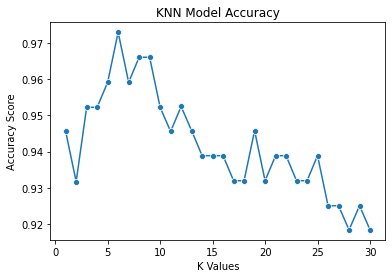

In [12]:
# Plot K values and accuracy of predictions
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.title("KNN Model Accuracy")
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.show()


In [13]:
# Identify the best K values and train model using the best k value 
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [14]:
y_pred = knn.predict(X_test)

In [15]:
# Check accuracy 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy,4))

Accuracy: 0.9667


In [16]:
# Evaluating Algorithm 
# Confusion matrix,  precision, recall, and f1 score. 

In [31]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'macro')  # 'macro': Calculate metrics for each label, and find their unweighted mean. 
recall = recall_score(y_test, y_pred, average = 'macro')

print("Accuracy:", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))

Accuracy: 0.9667
Precision: 0.9722
Recall: 0.9744


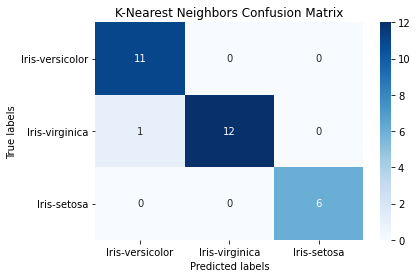

<Figure size 1440x960 with 0 Axes>

In [22]:
# Confusion matrix visualization 
cm_knn = confusion_matrix(y_test, y_pred)

ax = plt.subplot()
plt.figure(dpi=240)
sns.heatmap(cm_knn, annot=True, ax = ax, fmt='g', cmap='Blues') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('K-Nearest Neighbors Confusion Matrix')
labels = ['Iris-versicolor', 'Iris-virginica', 'Iris-setosa']
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels, rotation=360)
plt.show()


In [34]:
# Confusion matrix and Classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names = ['Iris-versicolor', 'Iris-virginica', 'Iris-setosa']))

[[11  0  0]
 [ 1 12  0]
 [ 0  0  6]]
                 precision    recall  f1-score   support

Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.92      0.96        13
    Iris-setosa       1.00      1.00      1.00         6

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
"""
Confusion Matrix allows us to measure Recall and Precision, 
which, along with Accuracy and the AUC-ROC curve, are the metrics used 
to measure the performance of ML models.

Accuracy shows how often a classification ML model is correct overall. 
Accuracy = Correct Predictions / All Predictions

Precision (positive predicted) is the ratio between true positives and all positives. 
Shows how often the model is correct when predicting the target class.
Precision = TruePositives / (TruePositives + FalsePositives)

Recall (sensitivity) is the ability to find all relevant instances of a class in a data set.
Recall = TruePositives / (TruePositives + FalseNegatives)

How to Calculate FN, FP, TN, and TP Values for multi-class classification?
FN: The False-negative value for a class will be the sum of values of corresponding rows 
except for the TP value. 
FP: The False-positive value for a class will be the sum of values of the corresponding column 
except for the TP value. 
TN: The True-negative value for a class will be the sum of the values of all columns and rows 
except the values of that class that we are calculating the values for.
TP: the True-positive value is where the actual value and predicted value are the same.

ROC curve and Area under the ROC Curve cannot be calculated for multi-class classification. 
It can only be implemented on per clas basis One-vs-Rest or One-vs-One for pairwise comparison. 
"""
